First Result Notes:

Looking at the results of NetD and NetE, there dosent seem to be a signficant difference
Both reached lowest rMSE of around 0.238. However, there is merit to the thought that when these networks are put through semi-supervised environments, they will perform differently
due to the difference no of core variables

Based on this paper: https://arxiv.org/pdf/1511.00561.pdfhttps://arxiv.org/pdf/1511.00561.pdf
Changing the loading process so that the comp image is a 1-layer of binary classification


Seconday Result Notes:
Significantly better results, only tested with netA. Now training all other models

In [1]:
import os
from lib.train_AI_lib import *
from lib.AutoEncoders import *
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
def genBBoxImages(dictPath='saved/splitData', inPath='data/working-wheat-data/train', oPath='saved/bboxMasked'):
    try: os.makedirs(oPath)  # Make the requested oPath
    except FileExistsError: None
    except: print("error creating folder {}".format(oPath)); return(0)
    else: None
    
    trainData = torch.load(dictPath+"/trainData")
    valData   = torch.load(dictPath+"/valData"  )
    testData  = torch.load(dictPath+"/testData" )
    trainData.update(valData); trainData.update(testData)
    imgPath   = inPath+'/'
    keyList   = list(trainData.keys())

    for i, imgName in enumerate(keyList):
        oimg  = cv2.imread(imgPath+imgName)
        bbox = trainData[imgName]
        mask = createMask(bbox, np.shape(oimg)[:-1])
        if i%100==0: print("Converted {:.2f}%".format(100*i/len(keyList)))
        np.save(oPath+'/'+imgName.split('.jpg')[0], mask)

In [4]:
#genBBoxImages()

In [5]:
def showResults(net, path):
    trainLoader, valLoader, testLoader = loadData(1, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
    net.load_state_dict(torch.load(path))
    softMax = nn.LogSoftmax()
    for img, compImg, _ in trainLoader:
        out = softMax(net(img.cuda()))
        pred = out.max(1, keepdim=True)[1]
        pred = pred.cpu().numpy()

        img = torch.transpose(torch.squeeze(img), 0, 1)
        img = torch.transpose(torch.squeeze(img), 1, 2)

        c = np.zeros((1024, 1024, 3))
        c[:, :, 1] = compImg

        p = np.zeros((1024, 1024, 3))
        p[:, :, 2] = pred

        plt.imshow(np.concatenate((img, c, p), 1))
        break

batchsize=64; epoch=15; lr=0.001
net = autEncA('autEncA'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

net = autEncA('autEncA'); net.cuda()
showResults(net, '/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/autEncA_b64_te15_lr0.001/model_epoch14')

batchsize=64; epoch=15; lr=0.001
net = autEncB('autEncB'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

net = autEncB('autEncB'); net.cuda()
showResults(net, '/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/autEncA_b64_te15_lr0.001/model_epoch14')

In [ ]:
batchsize=64; epoch=15; lr=0.001
net = autEncC('autEncC'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

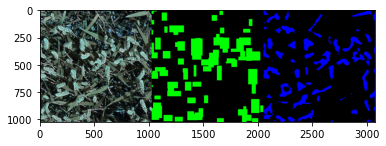

In [8]:
net = autEncC('autEncC'); net.cuda()
showResults(net, 'saved/TrainingRuns/AutoEncTrainer/autEncC_b64_te15_lr0.001/model_epoch14')

In [ ]:
batchsize=64; epoch=15; lr=0.001
net = autEncD('autEncD'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

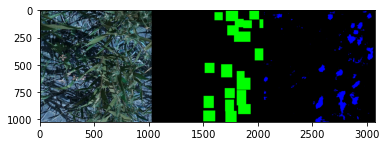

In [9]:
net = autEncD('autEncD'); net.cuda()
showResults(net, 'saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14')

In [ ]:
batchsize=64; epoch=15; lr=0.001
net = autEncE('autEncE'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

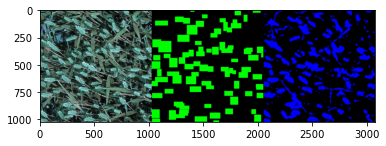

In [10]:
net = autEncE('autEncE'); net.cuda()
showResults(net, 'saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14')